In [1]:
!pip install  pandas chardet kneed

In [2]:
# @title –°–æ–∑–¥–∞–Ω–∏–µ dataframe –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
import csv
import pandas as pd
import chardet
import io
from google.colab import files
from typing import Dict, List, Optional, Any

# --- 3. –§—É–Ω–∫—Ü–∏—è 1: –ó–∞–≥—Ä—É–∑–∫–∞ CSV —Ñ–∞–π–ª–∞ –≤ Colab ---
def upload_csv(encoding: Optional[str] = None) -> io.StringIO:
    """
    –ó–∞–≥—Ä—É–∂–∞–µ—Ç CSV-—Ñ–∞–π–ª –≤ Colab. –ö–æ–¥–∏—Ä–æ–≤–∫—É –º–æ–∂–Ω–æ –∑–∞–¥–∞—Ç—å –≤—Ä—É—á–Ω—É—é –∏–ª–∏ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏.

    Args:
        encoding (str, optional): –ö–æ–¥–∏—Ä–æ–≤–∫–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, 'utf-8', 'cp1251'). –ï—Å–ª–∏ None ‚Äî –∞–≤—Ç–æ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ.

    Returns:
        io.StringIO: –ë—É—Ñ–µ—Ä —Å –¥–∞–Ω–Ω—ã–º–∏, –≥–æ—Ç–æ–≤—ã–π –¥–ª—è pd.read_csv.
    """
    print("üìé –ó–∞–≥—Ä—É–∑–∏ CSV-—Ñ–∞–π–ª")
    uploaded = files.upload()
    filename = next(iter(uploaded))
    raw_data = uploaded[filename]

    # –ï—Å–ª–∏ –∫–æ–¥–∏—Ä–æ–≤–∫–∞ –Ω–µ –∑–∞–¥–∞–Ω–∞ ‚Äî –æ–ø—Ä–µ–¥–µ–ª—è–µ–º
    if encoding is None:
        detected = chardet.detect(raw_data)['encoding']
        print(f"üîç –ê–≤—Ç–æ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –∫–æ–¥–∏—Ä–æ–≤–∫–∞: {detected}")
        encoding = detected

        # –ü–æ–¥—Å—Ç—Ä–∞—Ö–æ–≤–∫–∞: –µ—Å–ª–∏ chardet –≤–µ—Ä–Ω—É–ª —á—Ç–æ-—Ç–æ —Å—Ç—Ä–∞–Ω–Ω–æ–µ (–Ω–∞–ø—Ä–∏–º–µ—Ä, MacRoman), –ø–æ–ø—Ä–æ–±—É–µ–º utf-8
        suspicious_encodings = ['MacRoman', 'MacCyrillic', 'ISO-8859-1']
        if encoding in suspicious_encodings:
            print(f"‚ö†Ô∏è  –ü–æ–¥–æ–∑—Ä–∏—Ç–µ–ª—å–Ω–∞—è –∫–æ–¥–∏—Ä–æ–≤–∫–∞: {encoding}. –ü—Ä–æ–±—É–µ–º utf-8...")
            try:
                # –°–Ω–∞—á–∞–ª–∞ –ø—Ä–æ–±—É–µ–º utf-8
                decoded = raw_data.decode('utf-8')
                print("‚úÖ –£—Å–ø–µ—à–Ω–æ –¥–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–æ –∫–∞–∫ utf-8")
                return io.StringIO(decoded)
            except UnicodeDecodeError:
                print(f"‚ùå utf-8 –Ω–µ –ø–æ–¥–æ—à—ë–ª. –ò—Å–ø–æ–ª—å–∑—É–µ–º {encoding} –∫–∞–∫ fallback.")

    # –ü—Ä–æ–±—É–µ–º –¥–µ–∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å —Å –≤—ã–±—Ä–∞–Ω–Ω–æ–π –∫–æ–¥–∏—Ä–æ–≤–∫–æ–π
    try:
        decoded = raw_data.decode(encoding)
        print(f"‚úÖ –ò—Å–ø–æ–ª—å–∑—É–µ–º –∫–æ–¥–∏—Ä–æ–≤–∫—É: {encoding}")
        return io.StringIO(decoded)
    except UnicodeDecodeError as e:
        print(f"‚ùå –û—à–∏–±–∫–∞ –¥–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è —Å –∫–æ–¥–∏—Ä–æ–≤–∫–æ–π '{encoding}': {e}")
        # Fallback: –ø–æ–ø—Ä–æ–±—É–µ–º cp1251 (—á–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è —Ä—É—Å—Å–∫–∏—Ö CSV)
        try:
            print("üîÅ –ü—Ä–æ–±—É–µ–º fallback: cp1251")
            decoded = raw_data.decode('cp1251')
            print("‚úÖ –£—Å–ø–µ—à–Ω–æ –¥–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–æ –∫–∞–∫ cp1251")
            return io.StringIO(decoded)
        except:
            raise ValueError("–ù–µ —É–¥–∞–ª–æ—Å—å –¥–µ–∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å —Ñ–∞–π–ª. –£–±–µ–¥–∏—Å—å, —á—Ç–æ —ç—Ç–æ —Ç–µ–∫—Å—Ç–æ–≤—ã–π CSV.")


# --- 4. –§—É–Ω–∫—Ü–∏—è 2: –°–æ–∑–¥–∞–Ω–∏–µ DataFrame —Å –≥–∏–±–∫–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ ---
def create_dataframe_from_csv(
    csv_buffer: io.StringIO,
    nrows: Optional[int] = None,
    column_names: Optional[List[str]] = None,
    sep: str = None
) -> pd.DataFrame:
    """
    –°–æ–∑–¥–∞—ë—Ç DataFrame –∏–∑ –±—É—Ñ–µ—Ä–∞ CSV.

    Args:
        csv_buffer (io.StringIO): –ë—É—Ñ–µ—Ä —Å –¥–∞–Ω–Ω—ã–º–∏ CSV.
        nrows (int, optional): –°–∫–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫ –ø—Ä–æ—á–∏—Ç–∞—Ç—å. None ‚Äî –≤—Å–µ.
        column_names (List[str], optional): –°–ø–∏—Å–æ–∫ –∏–º—ë–Ω —Å—Ç–æ–ª–±—Ü–æ–≤. –ï—Å–ª–∏ None ‚Äî –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∏–∑ —Ñ–∞–π–ª–∞.
        sep (str, optional): –†–∞–∑–¥–µ–ª–∏—Ç–µ–ª—å. –ï—Å–ª–∏ None ‚Äî –∞–≤—Ç–æ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ.

    Returns:
        pd.DataFrame
    """
    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ø–æ–∑–∏—Ü–∏—é, —á—Ç–æ–±—ã –º–æ–∂–Ω–æ –±—ã–ª–æ –ø—Ä–æ—á–∏—Ç–∞—Ç—å –¥–≤–∞–∂–¥—ã
    csv_buffer.seek(0)

    # –ê–≤—Ç–æ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–∞–∑–¥–µ–ª–∏—Ç–µ–ª—è
    if sep is None:
        sample = csv_buffer.read(10000)
        sniffer = csv.Sniffer()
        sep = sniffer.sniff(sample).delimiter
        csv_buffer.seek(0)
        print(f"üîç –û–ø—Ä–µ–¥–µ–ª—ë–Ω —Ä–∞–∑–¥–µ–ª–∏—Ç–µ–ª—å: {repr(sep)}")

    # –ß—Ç–µ–Ω–∏–µ
    df = pd.read_csv(
        csv_buffer,
        sep=sep,
        nrows=nrows,
        names=column_names,  # –µ—Å–ª–∏ –ø–µ—Ä–µ–¥–∞–Ω—ã ‚Äî –ø–µ—Ä–µ–æ–ø—Ä–µ–¥–µ–ª—è–µ–º
        header=0 if column_names is None else None  # –µ—Å–ª–∏ –∑–∞–¥–∞–ª–∏ column_names ‚Äî –Ω–µ—Ç header –≤ —Ñ–∞–π–ª–µ
    )

    print(f"‚úÖ –ó–∞–≥—Ä—É–∂–µ–Ω–æ {len(df)} —Å—Ç—Ä–æ–∫")
    print(f"üìã –ü–µ—Ä–≤—ã–µ —Å—Ç—Ä–æ–∫–∏:\n{df.head()}")
    return df

# —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –≤ csv

In [3]:
# @title —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—è dataframe
def dataframe_filter(
    df: pd.DataFrame,
    text_column: str,
    filter_condition: Optional[Dict[str, Any]] = None,
    str_format = True
) -> List[str]|pd.DataFrame:
    """
    –§–∏–ª—å—Ç—Ä—É–µ—Ç DataFrame –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ø–∏—Å–æ–∫ —Ç–µ–∫—Å—Ç–æ–≤ –∏–∑ —É–∫–∞–∑–∞–Ω–Ω–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞.
    –ê–Ω–∞–ª–æ–≥ SQL: SELECT text_column FROM df WHERE condition

    Args:
        df (pd.DataFrame): –î–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –¥–∞–Ω–Ω—ã–º–∏.
        text_column (str): –ù–∞–∑–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ —Å —Ç–µ–∫—Å—Ç–æ–º.
        filter_condition (Dict[str, Any], optional): –£—Å–ª–æ–≤–∏–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –≤ —Ñ–æ—Ä–º–∞—Ç–µ
            {"column": "–Ω–∞–∑–≤–∞–Ω–∏–µ_—Å—Ç–æ–ª–±—Ü–∞", "value": –∑–Ω–∞—á–µ–Ω–∏–µ} –∏–ª–∏
            {"column": "–Ω–∞–∑–≤–∞–Ω–∏–µ_—Å—Ç–æ–ª–±—Ü–∞", "values": [–∑–Ω–∞—á–µ–Ω–∏–µ1, –∑–Ω–∞—á–µ–Ω–∏–µ2]} –¥–ª—è –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ –≤—ã–±–æ—Ä–∞

    Returns:
        List[str]: –°–ø–∏—Å–æ–∫ —Ç–µ–∫—Å—Ç–æ–≤ –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏
    """
    # –ü—Ä–∏–º–µ–Ω—è–µ–º —Ñ–∏–ª—å—Ç—Ä –µ—Å–ª–∏ —É–∫–∞–∑–∞–Ω
    if filter_condition:
        filtered_df = df.copy()
        column = filter_condition.get("column")
        value = filter_condition.get("value")
        values = filter_condition.get("values")

        if column and column in df.columns:
            if value is not None:
                filtered_df = filtered_df[filtered_df[column] == value]
            elif values is not None:
                filtered_df = filtered_df[filtered_df[column].isin(values)]
            else:
                print("‚ö†Ô∏è –£–∫–∞–∑–∞–Ω —Ñ–∏–ª—å—Ç—Ä, –Ω–æ –Ω–µ —É–∫–∞–∑–∞–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏. –ò—Å–ø–æ–ª—å–∑—É–µ–º –≤—Å–µ —Å—Ç—Ä–æ–∫–∏.")
        else:
            print(f"‚ö†Ô∏è –°—Ç–æ–ª–±–µ—Ü '{column}' –Ω–µ –Ω–∞–π–¥–µ–Ω –≤ DataFrame. –ò—Å–ø–æ–ª—å–∑—É–µ–º –≤—Å–µ —Å—Ç—Ä–æ–∫–∏.")
            filtered_df = df
    else:
        filtered_df = df

    print(f"üìä –û—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–æ {len(filtered_df)} —Å—Ç—Ä–æ–∫ –∏–∑ {len(df)}")

    # –í–æ–∑–≤—Ä–∞—â–∞–µ–º —Å–ø–∏—Å–æ–∫ —Ç–µ–∫—Å—Ç–æ–≤ –ª–∏–±–æ dataframe
    return filtered_df[text_column].tolist() if str_format else filtered_df

In [4]:
# @title –∞–ª–≥–æ—Ä–∏—Ç–º—ã K-MEANS
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics.pairwise import cosine_distances
from scipy.spatial.distance import squareform
from sklearn.cluster import KMeans
from kneed import KneeLocator


def find_elbow_k_auto(inertia_dict, show_plot=False):
    k_range = list(inertia_dict.keys())
    inertias = list(inertia_dict.values())

    # –ò—â–µ–º —Ç–æ—á–∫—É "–ª–æ–∫—Ç—è"
    knee_locator = KneeLocator(
        k_range,
        inertias,
        curve='convex',
        direction='decreasing',
        online=True
    )

    optimal_k = knee_locator.knee

    if show_plot:
      plot_elbow(inertia_dict)

    return optimal_k



def compute_inertia_range(vectors, k_min=5, k_max=None):
    """
    –í—ã—á–∏—Å–ª—è–µ—Ç inertia –¥–ª—è –¥–∏–∞–ø–∞–∑–æ–Ω–∞ —á–∏—Å–ª–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ k.

    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
        vectors : array-like, shape (n_samples, n_features)
            –ú–∞—Ç—Ä–∏—Ü–∞ –≤–µ–∫—Ç–æ—Ä–æ–≤ (—ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –∏ —Ç.–ø.)
        k_min : int, optional (default=5)
            –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤.
        k_max : int or None, optional (default=None)
            –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤. –ï—Å–ª–∏ None ‚Äî –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏,
            –Ω–æ –Ω–µ –±–æ–ª–µ–µ 50.

    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
        dict: {k: inertia}
    """
    n_samples = len(vectors)

    # –ê–≤—Ç–æ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ k_max, –µ—Å–ª–∏ –Ω–µ –∑–∞–¥–∞–Ω–æ
    if k_max is None:
        min_cluster_size = 10
        raw_k_max = n_samples // min_cluster_size
        k_max = min(raw_k_max, 50)  # üîí –ñ—ë—Å—Ç–∫–∏–π –ª–∏–º–∏—Ç ‚Äî –Ω–µ –±–æ–ª—å—à–µ 50
    else:
        k_max = min(k_max, 50)  # ‚ö†Ô∏è –î–∞–∂–µ –µ—Å–ª–∏ –ø–µ—Ä–µ–¥–∞–ª–∏ 100 ‚Äî –æ–±—Ä–µ–∑–∞–µ–º –¥–æ 50

    # k_min –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –º–µ–Ω—å—à–µ k_max
    k_min = max(2, k_min)  # –º–∏–Ω–∏–º—É–º 2
    k_max = max(k_min + 1, k_max)

    # –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ—á–µ–∫ —Ä–∞—Å—á—ë—Ç–∞ (—á—Ç–æ–±—ã –Ω–µ –±—ã–ª–æ 50 —à–∞–≥–æ–≤ –ø–æ 1)
    max_evaluations = 25
    if k_max - k_min + 1 > max_evaluations:
        # –†–∞–≤–Ω–æ–º–µ—Ä–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—è–µ–º —Ç–æ—á–∫–∏
        k_range = np.linspace(k_min, k_max, num=max_evaluations, dtype=int)
        k_range = sorted(set(k_range))
    else:
        k_range = range(k_min, k_max + 1)

    # –°—á–∏—Ç–∞–µ–º –∏–Ω–µ—Ä—Ü–∏—é
    inertia_dict = {}
    for k in k_range:
        if k >= n_samples:
            continue  # –Ω–µ–ª—å–∑—è –∏–º–µ—Ç—å –±–æ–ª—å—à–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, —á–µ–º –æ–±—ä–µ–∫—Ç–æ–≤
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(vectors)
        inertia_dict[k] = kmeans.inertia_

    return inertia_dict



def plot_elbow(inertia_dict):
    """
    –°—Ç—Ä–æ–∏—Ç –≥—Ä–∞—Ñ–∏–∫ –º–µ—Ç–æ–¥–∞ –ª–æ–∫—Ç—è.
    """
    ks = list(inertia_dict.keys())
    inertias = list(inertia_dict.values())

    plt.figure(figsize=(10, 6))
    plt.plot(ks, inertias, 'o-', linewidth=2, markersize=6)
    plt.title("–ú–µ—Ç–æ–¥ –ª–æ–∫—Ç—è: –≤—ã–±–æ—Ä –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ —á–∏—Å–ª–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤")
    plt.xlabel("–ß–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (k)")
    plt.ylabel("Inertia")
    plt.grid(True, alpha=0.3)
    plt.xticks(ks)
    plt.tight_layout()
    plt.show()


def run_kmeans(vectors, n_clusters):
    """
    –ó–∞–ø—É—Å–∫–∞–µ—Ç K-Means —Å K-Means++ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–µ–π.
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç: labels, centroids, inertia
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(vectors)
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    return labels, centroids, inertia




def evaluate_cluster_coherence(vectors, labels, similarity_threshold=0.35, coherence_threshold=0.8):
    """
    –û—Ü–µ–Ω–∏–≤–∞–µ—Ç –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞.
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ª–æ–≤–∞—Ä—å —Å –º–µ—Ç—Ä–∏–∫–∞–º–∏.
    """
    unique_labels = [l for l in np.unique(labels) if l != -1]
    results = {}

    for label in sorted(unique_labels):
        mask = labels == label
        cluster_vectors = vectors[mask]
        n = len(cluster_vectors)

        if n == 1:
            results[label] = {
                "size": n,
                "coherent": True,
                "similar_pairs_ratio": 1.0,
                "avg_distance": 0.0
            }
            continue

        dist_matrix = cosine_distances(cluster_vectors)
        distances = squareform(dist_matrix, checks=False)

        similar_ratio = np.mean(distances < similarity_threshold)
        avg_dist = np.mean(distances)
        is_coherent = similar_ratio >= coherence_threshold

        results[label] = {
            "size": n,
            "coherent": bool(is_coherent),
            "similar_pairs_ratio": float(similar_ratio),
            "avg_distance": float(avg_dist)
        }

    return results

In [5]:
# @title –æ—á–∏—Å—Ç–∫–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
def refine_clusters(
    vectors,
    labels,
    centroids,
    coherence_results,
    min_coherence_for_cleaning=0.75,
    min_cluster_size=5
):
    """
    –û—á–∏—â–∞–µ—Ç –∫–ª–∞—Å—Ç–µ—Ä—ã:
    - –ï—Å–ª–∏ –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å < min_coherence_for_cleaning ‚Üí –∫–ª–∞—Å—Ç–µ—Ä —É–¥–∞–ª—è–µ—Ç—Å—è.
    - –ò–Ω–∞—á–µ: —É–¥–∞–ª—è–µ–º –≤—ã–±—Ä–æ—Å—ã (–≤–µ–∫—Ç–æ—Ä—ã –¥–∞–ª–µ–∫–æ –æ—Ç —Ü–µ–Ω—Ç—Ä–æ–∏–¥–∞).
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç: –æ–±–Ω–æ–≤–ª—ë–Ω–Ω—ã–µ –º–µ—Ç–∫–∏, —Å–ø–∏—Å–æ–∫ –æ—Å–∏—Ä–æ—Ç–µ–≤—à–∏—Ö –∏–Ω–¥–µ–∫—Å–æ–≤.
    """
    new_labels = labels.copy()
    orphaned_indices = []

    for cluster_id, metrics in coherence_results.items():
        size = metrics["size"]
        ratio = metrics["coherent"]

        if not metrics["coherent"]:
            # –£–¥–∞–ª—è–µ–º –≤–µ—Å—å –∫–ª–∞—Å—Ç–µ—Ä
            mask = labels == cluster_id
            orphaned_indices.extend(np.where(mask)[0])
            new_labels[mask] = -1  # —à—É–º
            print(f"‚ùå –ö–ª–∞—Å—Ç–µ—Ä {cluster_id} (—Ä–∞–∑–º–µ—Ä {size}) —É–¥–∞–ª—ë–Ω: –Ω–∏–∑–∫–∞—è –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å")
        else:
            # –û—á–∏—â–∞–µ–º –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤
            mask = labels == cluster_id
            cluster_vectors = vectors[mask]
            indices = np.where(mask)[0]
            centroid = centroids[cluster_id]

            # –†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ —Ü–µ–Ω—Ç—Ä–æ–∏–¥–∞
            distances = cosine_distances(cluster_vectors, [centroid]).flatten()
            # –ü–æ—Ä–æ–≥: 80-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å –∏–ª–∏ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–π
            threshold = np.percentile(distances, 80)
            inliers = distances <= threshold

            # –ü–µ—Ä–µ–Ω–∞–∑–Ω–∞—á–∞–µ–º —Ç–æ–ª—å–∫–æ "—Ö–æ—Ä–æ—à–∏–µ"
            new_mask = np.zeros_like(mask)
            new_mask[indices[inliers]] = True
            new_labels[new_mask] = cluster_id

            # –û—Å—Ç–∞–ª—å–Ω—ã–µ ‚Äî –æ—Å–∏—Ä–æ—Ç–µ–ª–∏
            outliers = indices[~inliers]
            orphaned_indices.extend(outliers)

            print(f"‚úÖ –ö–ª–∞—Å—Ç–µ—Ä {cluster_id} (—Ä–∞–∑–º–µ—Ä {size}) –æ—á–∏—â–µ–Ω: {len(inliers)} –æ—Å—Ç–∞–ª–æ—Å—å")

    return new_labels, orphaned_indices

In [6]:
# @title –ø–µ—Ä–µ–Ω–∞–∑–Ω–∞—á–µ–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
def reassign_orphans_to_existing(
    vectors,
    orphaned_indices,
    labels,
    centroids,
    existing_coherence,
    coherence_threshold=0.9,
    distance_threshold=0.15
):
    """
    –ü—ã—Ç–∞–µ—Ç—Å—è –≤–µ—Ä–Ω—É—Ç—å –æ—Å–∏—Ä–æ—Ç–µ–≤—à–∏–µ –≤–µ–∫—Ç–æ—Ä—ã –≤ "–∏–¥–µ–∞–ª—å–Ω—ã–µ" –∫–ª–∞—Å—Ç–µ—Ä—ã (coherence > threshold).
    """
    new_labels = labels.copy()
    reassigned = 0

    # –¢–æ–ª—å–∫–æ "–∏–¥–µ–∞–ª—å–Ω—ã–µ" –∫–ª–∞—Å—Ç–µ—Ä—ã
    ideal_clusters = [
        cid for cid, res in existing_coherence.items()
        if res["coherent"] and res["similar_pairs_ratio"] >= coherence_threshold
    ]
    ideal_centroids = {cid: centroids[cid] for cid in ideal_clusters}

    for idx in orphaned_indices:
        vec = vectors[idx]
        best_cid = None
        min_dist = float('inf')

        for cid, cent in ideal_centroids.items():
            dist = cosine_distances([vec], [cent])[0][0]
            if dist < min_dist and dist < distance_threshold:
                min_dist = dist
                best_cid = cid

        if best_cid is not None:
            new_labels[idx] = best_cid
            reassigned += 1
            print(f"üîÅ –í–µ–∫—Ç–æ—Ä {idx} –¥–æ–±–∞–≤–ª–µ–Ω –≤ –∫–ª–∞—Å—Ç–µ—Ä {best_cid} (—Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {min_dist:.3f})")

    print(f"‚úÖ {reassigned} –≤–µ–∫—Ç–æ—Ä–æ–≤ –≤–æ–∑–≤—Ä–∞—â–µ–Ω—ã –≤ –∏–¥–µ–∞–ª—å–Ω—ã–µ –∫–ª–∞—Å—Ç–µ—Ä—ã")
    return new_labels

In [7]:
# @title –ø–µ—Ä–µ–∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤
from sklearn.cluster import KMeans

def cluster_remaining_orphans(
    vectors,
    labels,
    orphaned_indices,
    mean_cluster_size
):
    """
    –ö–ª–∞—Å—Ç–µ—Ä–∏–∑—É–µ—Ç –æ—Å—Ç–∞–≤—à–∏–µ—Å—è –æ—Å–∏—Ä–æ—Ç–µ–≤—à–∏–µ –≤–µ–∫—Ç–æ—Ä—ã.
    –ß–∏—Å–ª–æ –Ω–æ–≤—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ = len(orphans) // mean_cluster_size
    """
    remaining_indices = [i for i in orphaned_indices if labels[i] == -1]
    if not remaining_indices:
        return labels

    remaining_vectors = vectors[remaining_indices]
    n_remaining = len(remaining_vectors)
    n_new_clusters = max(1, n_remaining // mean_cluster_size)

    if n_remaining < 2 * n_new_clusters:
        print("‚ö†Ô∏è –°–ª–∏—à–∫–æ–º –º–∞–ª–æ –≤–µ–∫—Ç–æ—Ä–æ–≤ –¥–ª—è –Ω–æ–≤—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ ‚Äî –ø—Ä–æ–ø—É—â–µ–Ω–æ")
        return labels

    kmeans = KMeans(n_clusters=n_new_clusters, random_state=42)
    new_cluster_labels = kmeans.fit_predict(remaining_vectors)

    # –ù–æ–≤—ã–µ ID –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (—Å—Ç–∞—Ä—à–∏–µ –Ω–æ–º–µ—Ä–∞)
    offset = labels.max() + 1
    for i, label in enumerate(new_cluster_labels):
        global_idx = remaining_indices[i]
        labels[global_idx] = offset + label

    print(f"üÜï –°—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–æ {n_new_clusters} –Ω–æ–≤—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –∏–∑ {n_remaining} –≤–µ–∫—Ç–æ—Ä–æ–≤")
    return labels

In [8]:
# @title —Ñ–∏–Ω–∞–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
from scipy.spatial.distance import squareform


def generate_final_report(vectors, labels, reviews, similarity_threshold=0.35):
    """
    –ü–µ—á–∞—Ç–∞–µ—Ç –ø–æ–¥—Ä–æ–±–Ω—ã–π –æ—Ç—á—ë—Ç –ø–æ —Ñ–∏–Ω–∞–ª—å–Ω—ã–º –∫–ª–∞—Å—Ç–µ—Ä–∞–º.
    """

    def is_cluster_coherent(cluster_vectors, sim_thresh, coh_thresh=0.8):
        """
        –û–ø—Ä–µ–¥–µ–ª—è–µ—Ç, —è–≤–ª—è–µ—Ç—Å—è –ª–∏ –∫–ª–∞—Å—Ç–µ—Ä –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω—ã–º.
        """
        if len(cluster_vectors) == 1:
            return True
        dist_matrix = cosine_distances(cluster_vectors)
        distances = squareform(dist_matrix, checks=False)
        similar_ratio = np.mean(distances < sim_thresh)
        return similar_ratio >= coh_thresh

    # --- –í—ã–≤–æ–¥ —Ç–∞–±–ª–∏—Ü—ã ---
    unique_labels = sorted([l for l in np.unique(labels) if l != -1])
    if not unique_labels:
        print("‚ùå –ù–µ—Ç –≤–∞–ª–∏–¥–Ω—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤.")
        return

    print(f"\n{'–ö–ª–∞—Å—Ç–µ—Ä':<8} {'–†–∞–∑–º–µ—Ä':<6} {'–°—Ç–∞—Ç—É—Å':<10} {'% —Å—Ö–æ–∂–∏—Ö':<10} {'–°—Ä. —Ä–∞—Å—Å—Ç.'}")
    print("-" * 50)

    clean_count = 0

    for label in unique_labels:
        mask = labels == label
        cluster_vectors = vectors[mask]
        n = len(cluster_vectors)

        if n == 1:
            print(f"{label:<8} {n:<6} {'‚úÖ –ß–∏—Å—Ç—ã–π':<10} {'100%':<10} {'‚Äì':<8}")
            clean_count += 1
            continue

        # –ú–∞—Ç—Ä–∏—Ü–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π
        dist_matrix = cosine_distances(cluster_vectors)
        distances = squareform(dist_matrix, checks=False)
        similar_ratio = np.mean(distances < similarity_threshold)
        avg_distance = np.mean(distances)
        coherent = is_cluster_coherent(cluster_vectors, similarity_threshold)
        status = "‚úÖ –ß–∏—Å—Ç—ã–π" if coherent else "‚ùå –®—É–º–Ω—ã–π"
        ratio_pct = f"{similar_ratio * 100:.1f}%"

        print(f"{label:<8} {n:<6} {status:<10} {ratio_pct:<10} {avg_distance:.3f}")

        if coherent:
            clean_count += 1

    # --- –°–≤–æ–¥–∫–∞ ---
    total = len(unique_labels)
    noisy_count = total - clean_count
    print("-" * 50)
    print(f"üìä –ò—Ç–æ–≥–æ: {clean_count} —á–∏—Å—Ç—ã—Ö, {noisy_count} —à—É–º–Ω—ã—Ö –∏–∑ {total} –∫–ª–∞—Å—Ç–µ—Ä–æ–≤")

In [9]:
# @title —Å–æ—Ö—Ä–∞–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ –∏—Å—Ö–æ–¥–Ω—ã–π dataframe + csv
import pandas as pd

def add_column_by_indices(
    source_df: pd.DataFrame,
    new_col_name: str,
    new_col_data: list,
    indices=None,
    changed_df=None,
    csv_file_name: str = None,
    default_value=-1
) -> pd.DataFrame:
    """
    –î–æ–±–∞–≤–ª—è–µ—Ç –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü –≤ source_df, –∑–∞–ø–∏—Å—ã–≤–∞—è –¥–∞–Ω–Ω—ã–µ –∏–∑ new_col_data
    —Ç–æ–ª—å–∫–æ –≤ —Å—Ç—Ä–æ–∫–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –ø–µ—Ä–µ–¥–∞–Ω–Ω—ã–º –∏–Ω–¥–µ–∫—Å–∞–º (–∏–ª–∏ changed_df).

    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    -----------
    source_df : pd.DataFrame
        –ò—Å—Ö–æ–¥–Ω—ã–π DataFrame, –∫—É–¥–∞ –Ω—É–∂–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å –∫–æ–ª–æ–Ω–∫—É.
    new_col_name : str
        –ò–º—è –Ω–æ–≤–æ–π –∫–æ–ª–æ–Ω–∫–∏.
    new_col_data : list –∏–ª–∏ array
        –î–∞–Ω–Ω—ã–µ –¥–ª—è –∑–∞–ø–∏—Å–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤). –î–ª–∏–Ω–∞ –¥–æ–ª–∂–Ω–∞ —Å–æ–≤–ø–∞–¥–∞—Ç—å —Å —á–∏—Å–ª–æ–º –∏–Ω–¥–µ–∫—Å–æ–≤.
    indices : list –∏–ª–∏ pd.Index, optional
        –°–ø–∏—Å–æ–∫ –∏–Ω–¥–µ–∫—Å–æ–≤, –∫—É–¥–∞ –Ω—É–∂–Ω–æ –≤—Å—Ç–∞–≤–∏—Ç—å –¥–∞–Ω–Ω—ã–µ.
    changed_df : pd.DataFrame, optional
        –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞ indices ‚Äî –µ—Å–ª–∏ –ø–µ—Ä–µ–¥–∞–Ω, –±–µ—Ä—ë—Ç—Å—è –µ–≥–æ –∏–Ω–¥–µ–∫—Å.
    csv_file_name : str, optional
        –ï—Å–ª–∏ —É–∫–∞–∑–∞–Ω–æ ‚Äî —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ CSV.
    default_value : any, optional
        –ó–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è —Å—Ç—Ä–æ–∫, –Ω–µ –≤–æ—à–µ–¥—à–∏—Ö –≤ indices (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é -1).

    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    ------------
    pd.DataFrame —Å –Ω–æ–≤–æ–π –∫–æ–ª–æ–Ω–∫–æ–π.
    """

    # –°–æ–∑–¥–∞—ë–º –∫–æ–ø–∏—é, —á—Ç–æ–±—ã –Ω–µ –º–µ–Ω—è—Ç—å –æ—Ä–∏–≥–∏–Ω–∞–ª
    result_df = source_df.copy()

    # –û–ø—Ä–µ–¥–µ–ª—è–µ–º, –æ—Ç–∫—É–¥–∞ –±—Ä–∞—Ç—å –∏–Ω–¥–µ–∫—Å—ã
    if changed_df is not None:
        indices_to_use = changed_df.index
    elif indices is not None:
        indices_to_use = indices
    else:
        raise ValueError("–ù—É–∂–Ω–æ —É–∫–∞–∑–∞—Ç—å –ª–∏–±–æ changed_df, –ª–∏–±–æ indices")

    # –ü—Ä–æ–≤–µ—Ä–∫–∞ –¥–ª–∏–Ω—ã
    if len(new_col_data) != len(indices_to_use):
        raise ValueError(
            f"–î–ª–∏–Ω–∞ –¥–∞–Ω–Ω—ã—Ö ({len(new_col_data)}) –Ω–µ —Å–æ–≤–ø–∞–¥–∞–µ—Ç "
            f"—Å —á–∏—Å–ª–æ–º –∏–Ω–¥–µ–∫—Å–æ–≤ ({len(indices_to_use)})"
        )

    # –î–æ–±–∞–≤–ª—è–µ–º –∫–æ–ª–æ–Ω–∫—É —Å –¥–µ—Ñ–æ–ª—Ç–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º
    result_df[new_col_name] = default_value

    # –í—Å—Ç–∞–≤–ª—è–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ –∏–Ω–¥–µ–∫—Å–∞–º
    result_df.loc[indices_to_use, new_col_name] = new_col_data

    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –≤ CSV, –µ—Å–ª–∏ –Ω—É–∂–Ω–æ
    if csv_file_name is not None:
        result_df.to_csv(csv_file_name, index=False)
        print(f"–†–µ–∑—É–ª—å—Ç–∞—Ç —Å–æ—Ö—Ä–∞–Ω—ë–Ω –≤ {csv_file_name}")

    return result_df

In [10]:
# @title –∑–∞–ø—É—Å–∫ –ø–∞–π–ø–ª–∞–π–Ω–∞ —Å –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ n_clusters
import pandas as pd
import numpy as np
from typing import List, Dict

def multi_pipeline(
    vectors,
    reviews,
    k_range: List[int],
    similarity_threshold: float = 0.35,
    coherence_threshold: float = 0.8,
    min_coherence_for_cleaning: float = 0.75,
    min_cluster_size: int = 5,
    mean_cluster_size_factor: float = 0.8
):
    """
    –ó–∞–ø—É—Å–∫–∞–µ—Ç –ø–∞–π–ø–ª–∞–π–Ω –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –¥–ª—è –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π n_clusters.
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É —Å –º–µ—Ç—Ä–∏–∫–∞–º–∏.
    """
    results = []

    for n_clusters in k_range:
        print(f"\nüîÑ –ó–∞–ø—É—Å–∫ –¥–ª—è n_clusters = {n_clusters}")
        print("-" * 50)

        # 1. K-Means
        labels, centroids, inertia = run_kmeans(vectors, n_clusters)

        # 2. –û—Ü–µ–Ω–∫–∞ –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç–∏ –î–û –æ—á–∏—Å—Ç–∫–∏
        coherence_results = evaluate_cluster_coherence(
            vectors, labels, similarity_threshold, coherence_threshold
        )

        # 3. –û—á–∏—Å—Ç–∫–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
        cleaned_labels, orphaned_indices = refine_clusters(
            vectors, labels, centroids, coherence_results,
            min_coherence_for_cleaning=min_coherence_for_cleaning,
            min_cluster_size=min_cluster_size
        )

        # 4. –ü–µ—Ä–µ–Ω–∞–∑–Ω–∞—á–µ–Ω–∏–µ –≤ –∏–¥–µ–∞–ª—å–Ω—ã–µ –∫–ª–∞—Å—Ç–µ—Ä—ã
        final_labels = reassign_orphans_to_existing(
            vectors, orphaned_indices, cleaned_labels, centroids, coherence_results
        )

        # 5. –ü–µ—Ä–µ–∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤
        mean_size = np.mean([r["size"] for r in coherence_results.values()]) * mean_cluster_size_factor
        final_labels = cluster_remaining_orphans(
            vectors, final_labels, orphaned_indices, mean_size
        )

        # 6. –§–∏–Ω–∞–ª—å–Ω–∞—è –æ—Ü–µ–Ω–∫–∞
        final_coherence = evaluate_cluster_coherence(
            vectors, final_labels, similarity_threshold, coherence_threshold
        )
        unique_labels = [l for l in np.unique(final_labels) if l != -1]
        total_clusters = len(unique_labels)
        clean_clusters = sum(1 for r in final_coherence.values() if r["coherent"])

        # –°—Ä–µ–¥–Ω–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ
        coherent_ratios = [r["similar_pairs_ratio"] for r in final_coherence.values()]
        avg_coherence = np.mean(coherent_ratios) if coherent_ratios else 0

        # –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
        results.append({
            "n_clusters": n_clusters,
            "inertia": inertia,
            "total_after": total_clusters,
            "clean_after": clean_clusters,
            "clean_ratio": clean_clusters / total_clusters if total_clusters > 0 else 0,
            "avg_coherence": avg_coherence,
            "orphaned_count": len(orphaned_indices)
        })

        # –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ñ–∏–Ω–∞–ª—å–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ CSV (–æ–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ)
        df_final = pd.DataFrame({
            'review_short': reviews,
            'cluster_id': final_labels
        })
        df_final.to_csv(f"clusters_final_k{n_clusters}.csv", index=False, encoding='utf-8')
        print(f"‚úÖ –°–æ—Ö—Ä–∞–Ω–µ–Ω–æ: clusters_final_k{n_clusters}.csv")

    # –í–æ–∑–≤—Ä–∞—â–∞–µ–º —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É
    results_df = pd.DataFrame(results)
    return results_df

In [11]:
# –ó–∞–≥—Ä—É–∂–∞–µ–º –æ—Ç—Ä–µ–¥–∞–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π —Ñ–∞–π–ª —Å –ø—Ä–æ–≤–µ—Ä–µ–Ω–Ω—ã–º–∏ –∏ –æ—Ç—Ä–µ–¥–∞–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –∫–æ—Ä–æ—Ç–∫–∏–º–∏ –æ—Ç–∑—ã–≤–∞–º–∏
csv_short = upload_csv(encoding='utf-8')

üìé –ó–∞–≥—Ä—É–∑–∏ CSV-—Ñ–∞–π–ª


Saving categories_sammary_gpt20.csv to categories_sammary_gpt20.csv
‚úÖ –ò—Å–ø–æ–ª—å–∑—É–µ–º –∫–æ–¥–∏—Ä–æ–≤–∫—É: utf-8


In [12]:
df_short = create_dataframe_from_csv(
    csv_short,
    sep=','
)

‚úÖ –ó–∞–≥—Ä—É–∂–µ–Ω–æ 4896 —Å—Ç—Ä–æ–∫
üìã –ü–µ—Ä–≤—ã–µ —Å—Ç—Ä–æ–∫–∏:
                                             summary              category
0  –ü—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –º–æ–±–∏–ª—å–Ω–æ–≥–æ –±–∞–Ω–∫–∞ —É–¥–æ–±–Ω–æ, –±—ã—Å—Ç—Ä–æ –∏ –ø...  –ú–æ–±–∏–ª—å–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ
1                                        –ì–∞–∑–ø—Ä–æ–º–±–∞–Ω–∫                  –ë–∞–Ω–∫
2  –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–µ –º–Ω–µ–Ω–∏–µ –æ –ø—Ä–∏–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã—Ö —É—Å–ª–æ–≤–∏—è...                –í–∫–ª–∞–¥—ã
3  –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–µ –º–Ω–µ–Ω–∏–µ –æ –≤—ã–≥–æ–¥–Ω—ã—Ö –Ω–∞–∫–æ–ø–∏—Ç–µ–ª—å–Ω—ã—Ö ...   –ù–∞–∫–æ–ø–∏—Ç–µ–ª—å–Ω—ã–µ —Å—á–µ—Ç–∞
4  –•–æ—Ä–æ—à–∏–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è –ø–æ –¥–µ–±–µ—Ç–æ–≤—ã–º –∫–∞—Ä—Ç–∞–º —Å –∫—ç—à–±...       –î–µ–±–µ—Ç–æ–≤—ã–µ –∫–∞—Ä—Ç—ã


In [ ]:
df_short_ = dataframe_filter(
    df_short,
    'review_short',
    {'column':'category','values':['–î–µ–±–µ—Ç–æ–≤–∞—è –∫–∞—Ä—Ç–∞', '–ö—Ä–µ–¥–∏—Ç–Ω–∞—è –∫–∞—Ä—Ç–∞']},
    str_format = False
)
type(df_short_)

üìä –û—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–æ 395 —Å—Ç—Ä–æ–∫ –∏–∑ 4896


pandas.core.frame.DataFrame

In [13]:
# –û—á–∏—â–∞–µ–º —Ç–æ–ª—å–∫–æ –∫–æ–ª–æ–Ω–∫—É 'review_short', —Å–æ—Ö—Ä–∞–Ω—è—è –∏–Ω–¥–µ–∫—Å—ã
df_clean = df_short.dropna(subset=['category']).copy()
df_clean['category'] = df_clean['category'].astype(str).str.strip()
# –£–±–∏—Ä–∞–µ–º –ø—É—Å—Ç—ã–µ —Å—Ç—Ä–æ–∫–∏ (–ø–æ—Å–ª–µ strip)
df_clean = df_clean[df_clean['category'].str.len() > 0]

# –¢–µ–ø–µ—Ä—å –≤ df_clean –æ—Å—Ç–∞–ª–∏—Å—å —Ç–æ–ª—å–∫–æ "—Ö–æ—Ä–æ—à–∏–µ" —Å—Ç—Ä–æ–∫–∏, –∏ –∏—Ö –∏–Ω–¥–µ–∫—Å—ã ‚Äî –∏–∑ –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–≥–æ df_short
list_short_reviews = df_clean['category'].tolist()
print(f"–û—Å—Ç–∞–ª–æ—Å—å —Ç–µ–∫—Å—Ç–æ–≤ –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏: {len(list_short_reviews)}")

–û—Å—Ç–∞–ª–æ—Å—å —Ç–µ–∫—Å—Ç–æ–≤ –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏: 4896


In [14]:
df_clean.head(10)

summary              category
0  –ü—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –º–æ–±–∏–ª—å–Ω–æ–≥–æ –±–∞–Ω–∫–∞ —É–¥–æ–±–Ω–æ, –±—ã—Å—Ç—Ä–æ –∏ –ø...  –ú–æ–±–∏–ª—å–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ
1                                        –ì–∞–∑–ø—Ä–æ–º–±–∞–Ω–∫                  –ë–∞–Ω–∫
2  –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–µ –º–Ω–µ–Ω–∏–µ –æ –ø—Ä–∏–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã—Ö —É—Å–ª–æ–≤–∏—è...                –í–∫–ª–∞–¥—ã
3  –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–µ –º–Ω–µ–Ω–∏–µ –æ –≤—ã–≥–æ–¥–Ω—ã—Ö –Ω–∞–∫–æ–ø–∏—Ç–µ–ª—å–Ω—ã—Ö ...   –ù–∞–∫–æ–ø–∏—Ç–µ–ª—å–Ω—ã–µ —Å—á–µ—Ç–∞
4  –•–æ—Ä–æ—à–∏–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è –ø–æ –¥–µ–±–µ—Ç–æ–≤—ã–º –∫–∞—Ä—Ç–∞–º —Å –∫—ç—à–±...       –î–µ–±–µ—Ç–æ–≤—ã–µ –∫–∞—Ä—Ç—ã
5                        –ü—Ä–æ–±–ª–µ–º—ã —Å –ø–æ–¥–¥–µ—Ä–∂–∫–æ–π –±–∞–Ω–∫–∞             –ü–æ–¥–¥–µ—Ä–∂–∫–∞
6                       –û–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∫–∞—Ä—Ç—ã –±–µ—Å–ø–ª–∞—Ç–Ω–æ                 –ö–∞—Ä—Ç–∞
7                       –ü–æ–¥–¥–µ—Ä–∂–∫–∞ —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–∞ 4 –∏–∑ 5             –ü–æ–¥–¥–µ—Ä–∂–∫–∞
8                        –û–Ω–ª–∞–π–Ω –±–∞–Ω–∫ –ø—Ä–æ—Å—Ç –∏ –ø–æ–Ω—è—Ç–µ–Ω           –û–Ω–ª–∞–π–Ω –±–∞–Ω–∫
9                       –ö—ç—à–±—ç–∫ –Ω–∞—á–∏—Å–ª—è–µ—Ç—Å—è —Å—Ç–∞–±–∏–ª—å–Ω–æ                –ö—ç—à–±—ç–∫

In [ ]:
#df_short_.head(10)

In [16]:
from sentence_transformers import SentenceTransformer
# –ø–æ–ª—É—á–µ–Ω–∏–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤ –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏
model = SentenceTransformer("intfloat/multilingual-e5-large")
#model = SentenceTransformer("cointegrated/rubert-tiny2")
vectors_short = model.encode(list_short_reviews)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

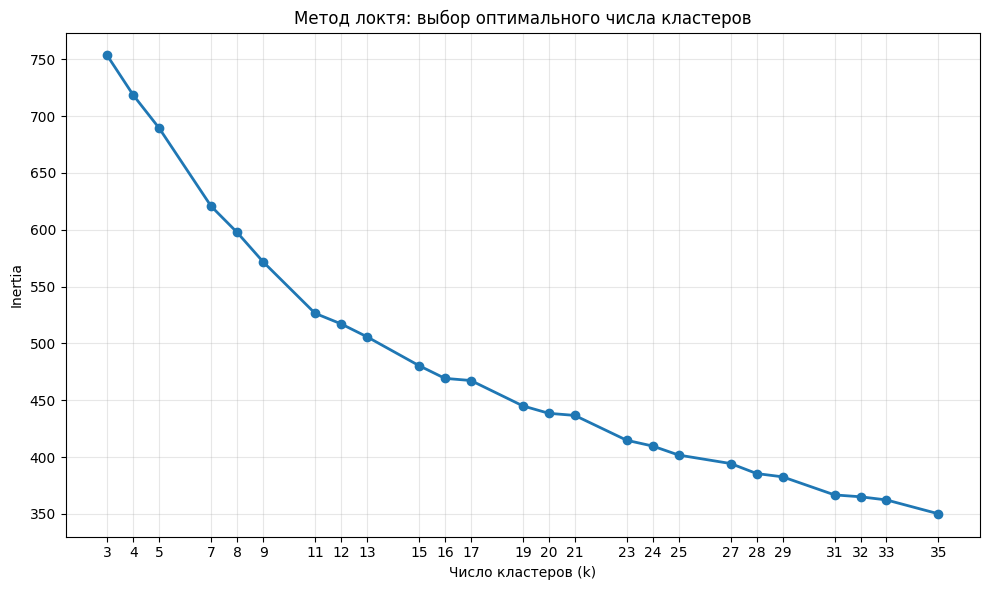

optimal_clusters_n=np.int64(15)


In [17]:
# –≠—Ç–∞–ø 0: –ú–µ—Ç–æ–¥ –ª–æ–∫—Ç—è - –≤—ã–±–∏—Ä–∞–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –ø–æ –≥—Ä–∞—Ñ–∏–∫—É
inertia_dict = compute_inertia_range(vectors_short, k_min=3, k_max=35)
optimal_clusters_n = find_elbow_k_auto(inertia_dict, show_plot=True)
print(f'{optimal_clusters_n=}')



In [31]:
# –í—ã–±–∏—Ä–∞–µ–º k, –Ω–∞–ø—Ä–∏–º–µ—Ä:
optimal_k = 17

# –≠—Ç–∞–ø 1: –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è
labels, centroids, inertia = run_kmeans(vectors_short, n_clusters=optimal_k)

# –≠—Ç–∞–ø 2: –û—Ü–µ–Ω–∫–∞
coherence_results = evaluate_cluster_coherence(
    vectors=vectors_short,
    labels=labels,
    similarity_threshold=0.15,
    coherence_threshold=0.75
)

# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
for cluster_id, metrics in coherence_results.items():
    print(f"–ö–ª–∞—Å—Ç–µ—Ä {cluster_id}: {metrics}")

pos_values = [value['coherent'] for value in coherence_results.values() if value['coherent']==True]
print(f'–•–æ—Ä–æ—à–∏—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤: {len(pos_values)} –∏–∑ {len(coherence_results)}')

–ö–ª–∞—Å—Ç–µ—Ä 0: {'size': 117, 'coherent': True, 'similar_pairs_ratio': 0.7960506926024168, 'avg_distance': 0.11728551238775253}
–ö–ª–∞—Å—Ç–µ—Ä 1: {'size': 424, 'coherent': True, 'similar_pairs_ratio': 0.9996989160979526, 'avg_distance': 0.03331850469112396}
–ö–ª–∞—Å—Ç–µ—Ä 2: {'size': 474, 'coherent': True, 'similar_pairs_ratio': 0.9996788610271095, 'avg_distance': 0.01712701842188835}
–ö–ª–∞—Å—Ç–µ—Ä 3: {'size': 228, 'coherent': True, 'similar_pairs_ratio': 0.9162222737460392, 'avg_distance': 0.0990934893488884}
–ö–ª–∞—Å—Ç–µ—Ä 4: {'size': 137, 'coherent': True, 'similar_pairs_ratio': 1.0, 'avg_distance': 0.013749021105468273}
–ö–ª–∞—Å—Ç–µ—Ä 5: {'size': 96, 'coherent': False, 'similar_pairs_ratio': 0.6098684210526316, 'avg_distance': 0.10353834927082062}
–ö–ª–∞—Å—Ç–µ—Ä 6: {'size': 214, 'coherent': True, 'similar_pairs_ratio': 0.8118116800491422, 'avg_distance': 0.08592621982097626}
–ö–ª–∞—Å—Ç–µ—Ä 7: {'size': 240, 'coherent': True, 'similar_pairs_ratio': 0.998047419804742, 'avg_distance

In [32]:
# –û—á–∏—Å—Ç–∫–∞
new_labels, orphaned_indices = refine_clusters(
    vectors_short, labels, centroids, coherence_results,
    min_coherence_for_cleaning=0.75,
    min_cluster_size=5
)

# –ü–µ—Ä–µ–Ω–∞–∑–Ω–∞—á–µ–Ω–∏–µ –≤ –∏–¥–µ–∞–ª—å–Ω—ã–µ
final_labels = reassign_orphans_to_existing(
    vectors_short, orphaned_indices, new_labels, centroids, coherence_results
)

# –ü–µ—Ä–µ–∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤
mean_size = np.mean([r["size"] for r in coherence_results.values()])
final_labels = cluster_remaining_orphans(
    vectors_short, final_labels, orphaned_indices, mean_size
)



‚úÖ –ö–ª–∞—Å—Ç–µ—Ä 0 (—Ä–∞–∑–º–µ—Ä 117) –æ—á–∏—â–µ–Ω: 117 –æ—Å—Ç–∞–ª–æ—Å—å
‚úÖ –ö–ª–∞—Å—Ç–µ—Ä 1 (—Ä–∞–∑–º–µ—Ä 424) –æ—á–∏—â–µ–Ω: 424 –æ—Å—Ç–∞–ª–æ—Å—å
‚úÖ –ö–ª–∞—Å—Ç–µ—Ä 2 (—Ä–∞–∑–º–µ—Ä 474) –æ—á–∏—â–µ–Ω: 474 –æ—Å—Ç–∞–ª–æ—Å—å
‚úÖ –ö–ª–∞—Å—Ç–µ—Ä 3 (—Ä–∞–∑–º–µ—Ä 228) –æ—á–∏—â–µ–Ω: 228 –æ—Å—Ç–∞–ª–æ—Å—å
‚úÖ –ö–ª–∞—Å—Ç–µ—Ä 4 (—Ä–∞–∑–º–µ—Ä 137) –æ—á–∏—â–µ–Ω: 137 –æ—Å—Ç–∞–ª–æ—Å—å
‚ùå –ö–ª–∞—Å—Ç–µ—Ä 5 (—Ä–∞–∑–º–µ—Ä 96) —É–¥–∞–ª—ë–Ω: –Ω–∏–∑–∫–∞—è –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å
‚úÖ –ö–ª–∞—Å—Ç–µ—Ä 6 (—Ä–∞–∑–º–µ—Ä 214) –æ—á–∏—â–µ–Ω: 214 –æ—Å—Ç–∞–ª–æ—Å—å
‚úÖ –ö–ª–∞—Å—Ç–µ—Ä 7 (—Ä–∞–∑–º–µ—Ä 240) –æ—á–∏—â–µ–Ω: 240 –æ—Å—Ç–∞–ª–æ—Å—å
‚úÖ –ö–ª–∞—Å—Ç–µ—Ä 8 (—Ä–∞–∑–º–µ—Ä 227) –æ—á–∏—â–µ–Ω: 227 –æ—Å—Ç–∞–ª–æ—Å—å
‚ùå –ö–ª–∞—Å—Ç–µ—Ä 9 (—Ä–∞–∑–º–µ—Ä 775) —É–¥–∞–ª—ë–Ω: –Ω–∏–∑–∫–∞—è –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å
‚ùå –ö–ª–∞—Å—Ç–µ—Ä 10 (—Ä–∞–∑–º–µ—Ä 237) —É–¥–∞–ª—ë–Ω: –Ω–∏–∑–∫–∞—è –∫–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å
‚úÖ –ö–ª–∞—Å—Ç–µ—Ä 11 (—Ä–∞–∑–º–µ—Ä 345) –æ—á–∏—â–µ–Ω: 345 –æ—Å—Ç–∞–ª–æ—Å—å
‚úÖ –ö–ª–∞—Å—Ç–µ—Ä 12 (—Ä–∞–∑–º–µ—Ä 204) –

In [33]:
# –û—Ç—á—ë—Ç
generate_final_report(vectors_short, final_labels, list_short_reviews)



–ö–ª–∞—Å—Ç–µ—Ä  –†–∞–∑–º–µ—Ä –°—Ç–∞—Ç—É—Å     % —Å—Ö–æ–∂–∏—Ö   –°—Ä. —Ä–∞—Å—Å—Ç.
--------------------------------------------------
0        94     ‚úÖ –ß–∏—Å—Ç—ã–π   100.0%     0.096
1        519    ‚úÖ –ß–∏—Å—Ç—ã–π   100.0%     0.064
2        488    ‚úÖ –ß–∏—Å—Ç—ã–π   100.0%     0.023
3        766    ‚úÖ –ß–∏—Å—Ç—ã–π   100.0%     0.161
4        170    ‚úÖ –ß–∏—Å—Ç—ã–π   100.0%     0.056
6        208    ‚úÖ –ß–∏—Å—Ç—ã–π   100.0%     0.083
7        244    ‚úÖ –ß–∏—Å—Ç—ã–π   100.0%     0.028
8        253    ‚úÖ –ß–∏—Å—Ç—ã–π   100.0%     0.027
11       285    ‚úÖ –ß–∏—Å—Ç—ã–π   100.0%     0.094
12       219    ‚úÖ –ß–∏—Å—Ç—ã–π   100.0%     0.041
14       233    ‚úÖ –ß–∏—Å—Ç—ã–π   100.0%     0.093
16       1228   ‚úÖ –ß–∏—Å—Ç—ã–π   100.0%     0.176
17       189    ‚úÖ –ß–∏—Å—Ç—ã–π   100.0%     0.203
--------------------------------------------------
üìä –ò—Ç–æ–≥–æ: 13 —á–∏—Å—Ç—ã—Ö, 0 —à—É–º–Ω—ã—Ö –∏–∑ 13 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤


In [35]:
df_with_clusters = add_column_by_indices(
    source_df=df_short,
    new_col_name='cluster',
    new_col_data=labels,
    changed_df=df_clean,  # –∏—Å–ø–æ–ª—å–∑—É–µ–º –µ–≥–æ –∏–Ω–¥–µ–∫—Å
    csv_file_name='reviews_with_clusters_clean.csv',
    default_value=-1
)

–†–µ–∑—É–ª—å—Ç–∞—Ç —Å–æ—Ö—Ä–∞–Ω—ë–Ω –≤ reviews_with_clusters_clean.csv


In [36]:
df = pd.read_csv('reviews_with_clusters_clean.csv')
df

summary              category  \
0     –ü—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –º–æ–±–∏–ª—å–Ω–æ–≥–æ –±–∞–Ω–∫–∞ —É–¥–æ–±–Ω–æ, –±—ã—Å—Ç—Ä–æ –∏ –ø...  –ú–æ–±–∏–ª—å–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ   
1                                           –ì–∞–∑–ø—Ä–æ–º–±–∞–Ω–∫                  –ë–∞–Ω–∫   
2     –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–µ –º–Ω–µ–Ω–∏–µ –æ –ø—Ä–∏–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã—Ö —É—Å–ª–æ–≤–∏—è...                –í–∫–ª–∞–¥—ã   
3     –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–µ –º–Ω–µ–Ω–∏–µ –æ –≤—ã–≥–æ–¥–Ω—ã—Ö –Ω–∞–∫–æ–ø–∏—Ç–µ–ª—å–Ω—ã—Ö ...   –ù–∞–∫–æ–ø–∏—Ç–µ–ª—å–Ω—ã–µ —Å—á–µ—Ç–∞   
4     –•–æ—Ä–æ—à–∏–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è –ø–æ –¥–µ–±–µ—Ç–æ–≤—ã–º –∫–∞—Ä—Ç–∞–º —Å –∫—ç—à–±...       –î–µ–±–µ—Ç–æ–≤—ã–µ –∫–∞—Ä—Ç—ã   
...                                                 ...                   ...   
4891  –ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å —É—Ç–æ—á–Ω—è–ª –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å —É–≤–µ–ª–∏—á–µ–Ω–∏—è –ª–∏...       –ö—Ä–µ–¥–∏—Ç–Ω–∞—è –∫–∞—Ä—Ç–∞   
4892  –ë–æ—Ç –≤ —á–∞—Ç–µ –æ—Ç–≤–µ—Ç–∏–ª –Ω–∞ –∑–∞–ø—Ä–æ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è, –ø—Ä–µ...                   –ë–æ—Ç   
4893  –ü–æ–ª—É—á–µ–Ω–∏–µ –Ω–µ—Å–∞–Ω–∫—Ü–∏–æ–Ω–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö SMS –æ –≤—Ö–æ–¥–µ –≤ –ø—Ä...                   –°–ú–°   
4894  –û–±—Ä–∞—â–µ–Ω–∏–µ –≤ —á–∞—Ç –ø–æ–¥–¥–µ—Ä–∂–∫–∏, –æ–ø–µ—Ä–∞—Ç–æ—Ä –∑–∞–¥–∞–ª–∞ –≤–æ–ø...                   –ß–∞—Ç   
4895  –°–±—Ä–æ—Å –ø–∞—Ä–æ–ª—è –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ –∏ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç-–±–∞–Ω–∫–µ –ø–æ ...                –ü–∞—Ä–æ–ª—å   

      cluster  
0           7  
1          10  
2          12  
3           4  
4           1  
...       ...  
4891        1  
4892       15  
4893       15  
4894       15  
4895       15  

[4896 rows x 3 columns]

In [37]:
import pandas as pd
from collections import Counter

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏–∑ CSV —Ñ–∞–π–ª–∞
df = pd.read_csv('reviews_with_clusters_clean.csv')

# –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ review_short ‚Äî —Å—Ç—Ä–æ–∫–æ–≤—ã–π —Ç–∏–ø
df['category'] = df['category'].astype(str)

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å–∞–º–æ–≥–æ —á–∞—Å—Ç–æ–≥–æ –Ω–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏—è –≤ –≥—Ä—É–ø–ø–µ
def most_common_name(texts):
    counter = Counter(texts)
    most_common = counter.most_common(1)
    return most_common[0][0] if most_common else ''

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ cluster_id –∏ –ø–æ–ª—É—á–∞–µ–º –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ–µ review_short –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞
cluster_names = df.groupby('cluster')['category'].apply(most_common_name).reset_index()

# –ü–µ—Ä–µ–∏–º–µ–Ω–æ–≤—ã–≤–∞–µ–º –∫–æ–ª–æ–Ω–∫—É –¥–ª—è –±–æ–ª–µ–µ –ø–æ–Ω—è—Ç–Ω–æ–≥–æ –Ω–∞–∑–≤–∞–Ω–∏—è
cluster_names.rename(columns={'category': 'claster_name'}, inplace=True)

# –û–±—ä–µ–¥–∏–Ω—è–µ–º —Å –∏—Å—Ö–æ–¥–Ω—ã–º DataFrame, –¥–æ–±–∞–≤–ª—è—è –∫–æ–ª–æ–Ω–∫—É claster_name –∫ –∫–∞–∂–¥–æ–π —Å—Ç—Ä–æ–∫–µ
df = pd.merge(df, cluster_names, on='cluster', how='left')

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –∏–ª–∏ –≤—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
df.to_csv('clusters_with_names.csv', index=False, encoding='utf-8')
df['claster_name'].value_counts()

claster_name
–ö–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏—è            775
–°–ª—É–∂–±–∞ –ø–æ–¥–¥–µ—Ä–∂–∫–∏        474
–î–µ–±–µ—Ç–æ–≤–∞—è –∫–∞—Ä—Ç–∞         424
–î–æ—Å—Ç–∞–≤–∫–∞                366
–î–æ—Å—Ç–∞–≤–∫–∞ –∫–∞—Ä—Ç—ã          345
–ö—É—Ä—å–µ—Ä—Å–∫–∞—è —Å–ª—É–∂–±–∞       297
–ë–∞–Ω–∫–æ–≤—Å–∫–∏–π –æ—Ñ–∏—Å         263
–ü–µ—Ä–µ–≤–æ–¥ —Å—Ä–µ–¥—Å—Ç–≤         252
–ú–æ–±–∏–ª—å–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ    240
–ë–∞–Ω–∫                    237
–ë–∞–Ω–∫–æ–≤—Å–∫–∞—è –∫–∞—Ä—Ç–∞        228
–ö–∞—Ä—Ç–∞                   227
–ö—ç—à–±—ç–∫                  214
–í–∫–ª–∞–¥                   204
–ù–∞–∫–æ–ø–∏—Ç–µ–ª—å–Ω—ã–π —Å—á–µ—Ç      137
–û–Ω–ª–∞–π–Ω-–±–∞–Ω–∫–∏–Ω–≥          117
–ê–∫—Ü–∏—è                    96
Name: count, dtype: int64

Batches:   0%|          | 0/153 [00:00<?, ?it/s]

/tmp/ipython-input-2887455792.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_clusters))


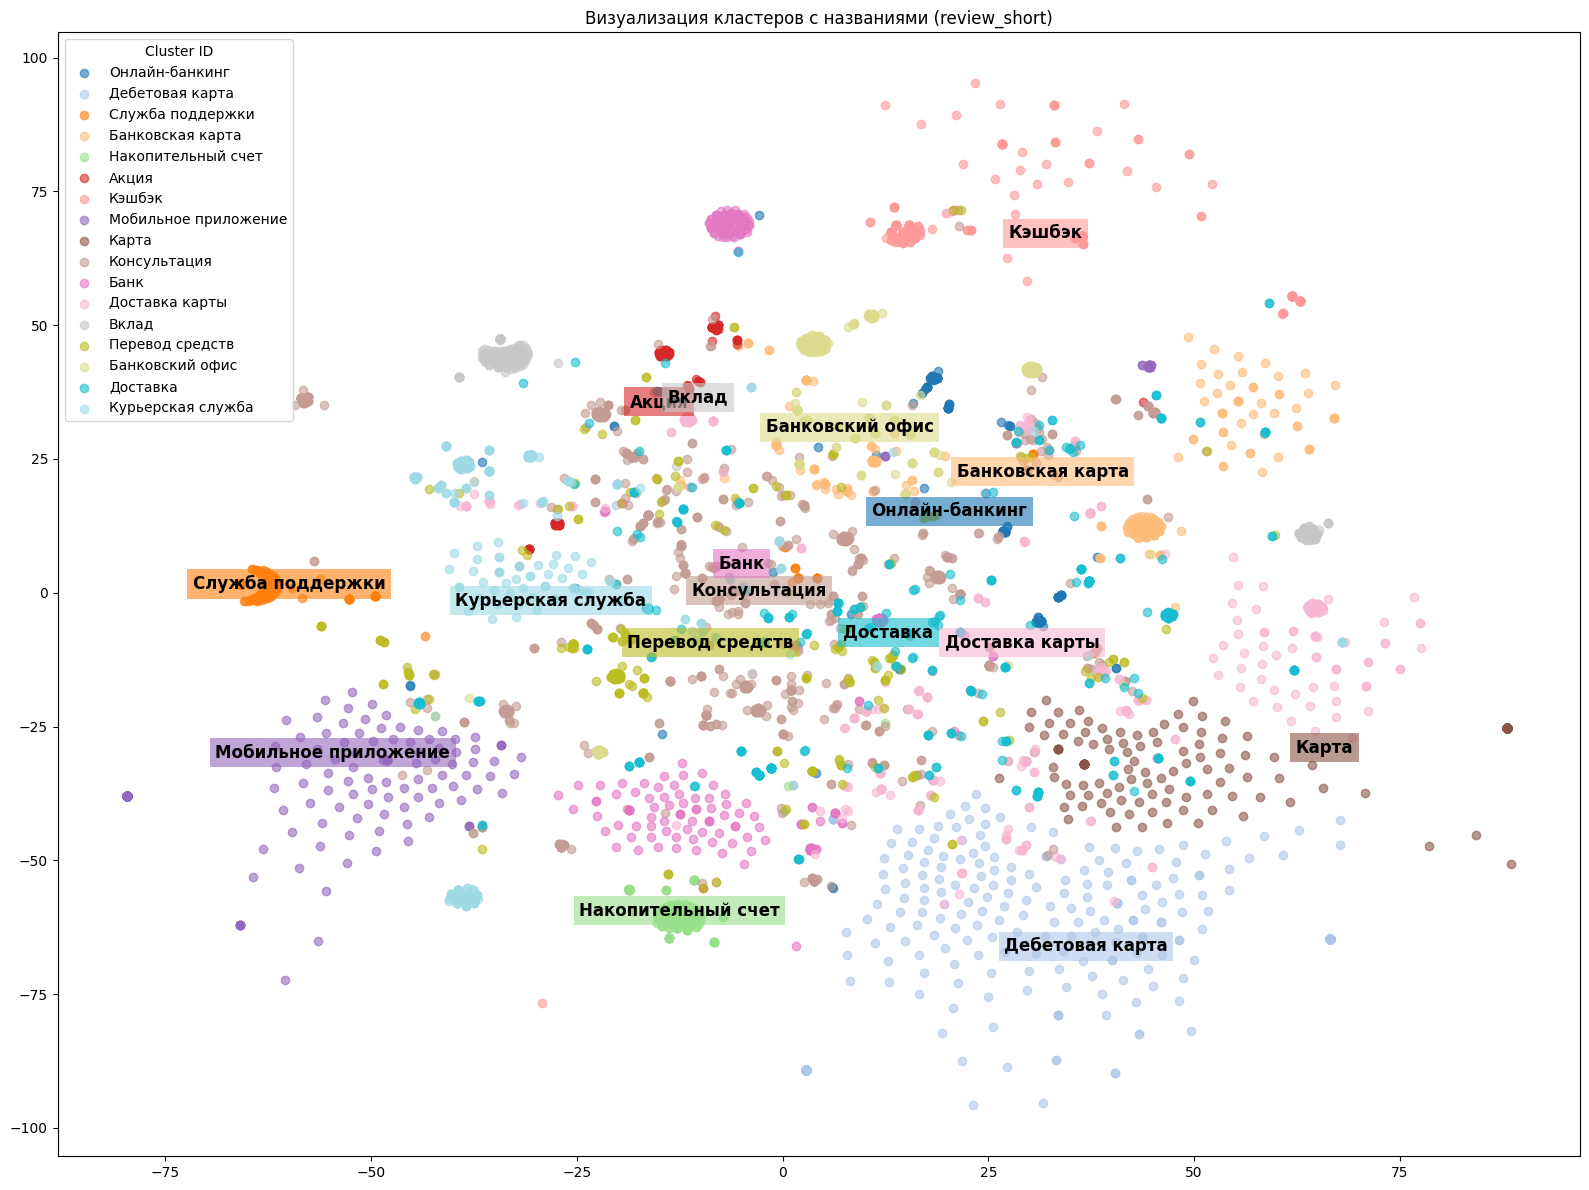

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
df = pd.read_csv('clusters_with_names.csv')  # –ò—Å–ø–æ–ª—å–∑—É–µ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤

# –ü–æ–¥–≥–æ—Ç–æ–≤–∏—Ç—å —Ç–µ–∫—Å—Ç—ã –¥–ª—è —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤
texts = df['category'].astype(str).tolist()

# –ü–æ–ª—É—á–∏—Ç—å —ç–º–±–µ–¥–¥–∏–Ω–≥–∏ —Å –ø–æ–º–æ—â—å—é SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')  # –∏–ª–∏ –¥—Ä—É–≥–∞—è –º–æ–¥–µ–ª—å
embeddings = model.encode(texts, show_progress_bar=True)

# –°–Ω–∏–∑–∏—Ç—å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ (2D)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(embeddings)

# –¶–≤–µ—Ç–∞ –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
clusters = df['cluster'].values
unique_clusters = np.unique(clusters)
colors = plt.cm.get_cmap('tab20', len(unique_clusters))

plt.figure(figsize=(16, 12))

# –†–∏—Å—É–µ–º —Ç–æ—á–∫–∏ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º
for i, cluster in enumerate(unique_clusters):
    cluster_name = df.loc[df['cluster'] == cluster, 'claster_name'].iloc[0]
    idx = clusters == cluster
    plt.scatter(
        embeddings_2d[idx, 0],
        embeddings_2d[idx, 1],
        # –ü–æ–ª—É—á–∞–µ–º –Ω–∞–∑–≤–∞–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–∞ –∏–∑ df –ø–æ cluster_id
        # –ò—Å–ø–æ–ª—å–∑—É–µ–º 'cluster_name' –≤ –∫–∞—á–µ—Å—Ç–≤–µ –º–µ—Ç–∫–∏ (label)
        label=cluster_name,
        alpha=0.6,
        color=colors(i)
    )

# –î–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞ –ø–æ–¥–ø–∏—Å—ã–≤–∞–µ–º –µ–≥–æ –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ–µ –Ω–∞–∑–≤–∞–Ω–∏–µ –≤ —Ü–µ–Ω—Ç—Ä–µ –∫–ª–∞—Å—Ç–µ—Ä–∞
cluster_centers = []
for cluster in unique_clusters:
    idx = np.where(clusters == cluster)[0]
    center_x = embeddings_2d[idx, 0].mean()
    center_y = embeddings_2d[idx, 1].mean()
    cluster_centers.append((center_x, center_y))

    # –ü–æ–ª—É—á–∞–µ–º –Ω–∞–∑–≤–∞–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–∞ –∏–∑ df –ø–æ cluster_id
    cluster_name = df.loc[df['cluster'] == cluster, 'claster_name'].iloc[0]
# –î–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞ –ø–æ–¥–ø–∏—Å—ã–≤–∞–µ–º –µ–≥–æ –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ–µ –Ω–∞–∑–≤–∞–Ω–∏–µ –≤ —Ü–µ–Ω—Ç—Ä–µ –∫–ª–∞—Å—Ç–µ—Ä–∞
for i, cluster in enumerate(unique_clusters): # *** –ò–ó–ú–ï–ù–ï–ù–ò–ï: –¥–æ–±–∞–≤–ª–µ–Ω–æ i –¥–ª—è –¥–æ—Å—Ç—É–ø–∞ –∫ —Ü–≤–µ—Ç—É ***
    idx = np.where(clusters == cluster)[0]
    center_x = embeddings_2d[idx, 0].mean()
    center_y = embeddings_2d[idx, 1].mean()

    # –ü–æ–ª—É—á–∞–µ–º –Ω–∞–∑–≤–∞–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–∞ –∏–∑ df –ø–æ cluster_id
    cluster_name = df.loc[df['cluster'] == cluster, 'claster_name'].iloc[0]

    plt.text(
        center_x,
        center_y,
        cluster_name,
        fontsize=12,  # *** –ò–ó–ú–ï–ù–ï–ù–ò–ï 1: –®—Ä–∏—Ñ—Ç –ø–æ–∫—Ä—É–ø–Ω–µ–µ ***
        weight='bold',
        ha='center',
        va='center',
        bbox=dict(
            facecolor=colors(i),  # *** –ò–ó–ú–ï–ù–ï–ù–ò–ï 2: –¶–≤–µ—Ç —Ñ–æ–Ω–∞ –±–µ—Ä–µ–º –∏–∑ –ø–∞–ª–∏—Ç—Ä—ã –∫–ª–∞—Å—Ç–µ—Ä–∞ ***
            alpha=0.6,            # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ø—Ä–æ–∑—Ä–∞—á–Ω–æ—Å—Ç—å –¥–ª—è —á–∏—Ç–∞–±–µ–ª—å–Ω–æ—Å—Ç–∏
            edgecolor='none'
        )
    )

plt.title('–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ —Å –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏ (review_short)')
plt.legend(title='Cluster ID', loc='upper left') #bbox_to_anchor=(1.05, 1)
plt.tight_layout()
plt.show()

In [35]:
#–ò—Ç–æ–≥–æ–≤—ã–π —Å–ø–∏—Å–æ–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–π

categories_list = [
    "–ö–∞—Ä—Ç—ã",
    "–ë–∞–Ω–∫–æ–º–∞—Ç—ã",
    "–ö—ç—à–±—ç–∫ / –ë–æ–Ω—É—Å—ã",
    "–û–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –≤ –æ—Ñ–∏—Å–µ",
    "–í–∫–ª–∞–¥—ã",
    "–ö—Ä–µ–¥–∏—Ç—ã",
    "–ö—É—Ä—å–µ—Ä—Å–∫–∞—è —Å–ª—É–∂–±–∞",
    "–ü—Ä–∏–ª–æ–∂–µ–Ω–∏–µ / —Å–∞–π—Ç",
    "–°–ª—É–∂–±–∞ –ø–æ–¥–¥–µ—Ä–∂–∫–∏",
    "–°—á–µ—Ç–∞",
    "–ü—Ä–æ—á–∏–µ —É—Å–ª—É–≥–∏"
]


In [ ]:
# –≥—Ä–∞—Ñ–∏–∫–∏
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –¥–∞—Ç—É –≤ –ø—Ä–∞–≤–∏–ª—å–Ω—ã–π —Ñ–æ—Ä–º–∞—Ç
df_with_clusters['date'] = pd.to_datetime(df_with_clusters['data(review_dttm)'], format='%d.%m.%Y', errors='coerce')

# –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å—Ç—Ä—É–∫—Ç—É—Ä—É –¥–∞–Ω–Ω—ã—Ö
print(df_with_clusters.info())
print(df_with_clusters.head())
print(f"–£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∫–ª–∞—Å—Ç–µ—Ä—ã: {sorted(df_with_clusters['cluster'].unique())}")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π: {len(df_with_clusters)}")

In [ ]:
import seaborn as sns
from datetime import datetime

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ —Å—Ç–∏–ª—è –≥—Ä–∞—Ñ–∏–∫–æ–≤
plt.style.use('default')
sns.set_palette("husl")

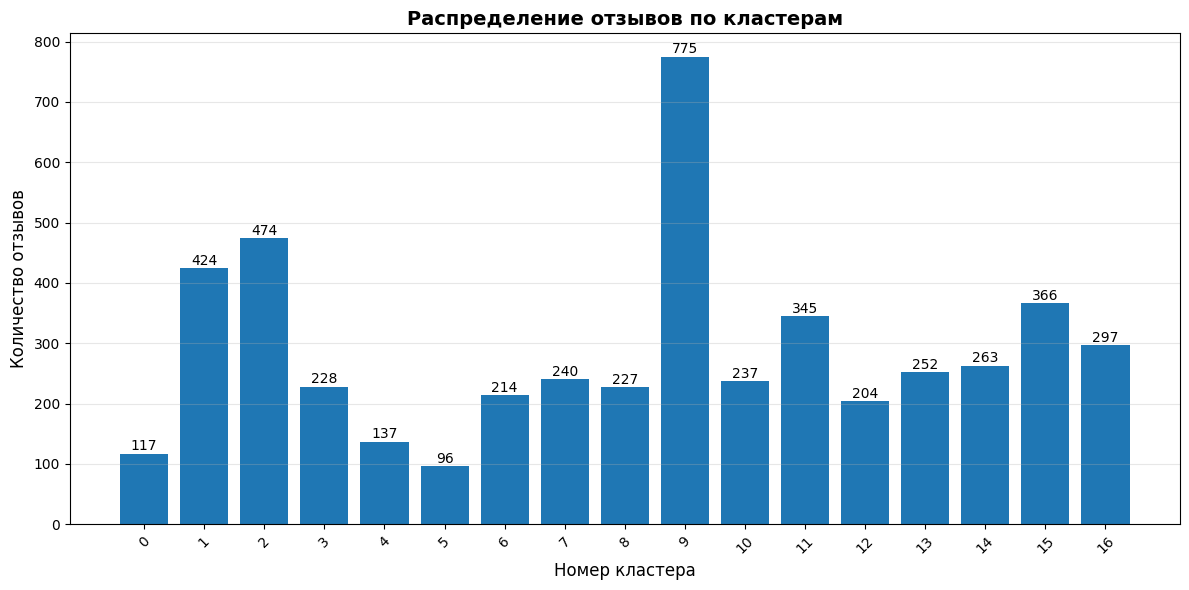

In [41]:


# 1. –°–¢–û–õ–ë–ß–ê–¢–ê–Ø –î–ò–ê–ì–†–ê–ú–ú–ê - –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–ï –ü–û –ö–õ–ê–°–¢–ï–†–ê–ú
plt.figure(figsize=(12, 6))
cluster_counts = df_with_clusters['cluster'].value_counts().sort_index()
bars = plt.bar(cluster_counts.index.astype(str), cluster_counts.values)

# –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom')

plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º', fontsize=14, fontweight='bold')
plt.xlabel('–ù–æ–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞', fontsize=12)
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



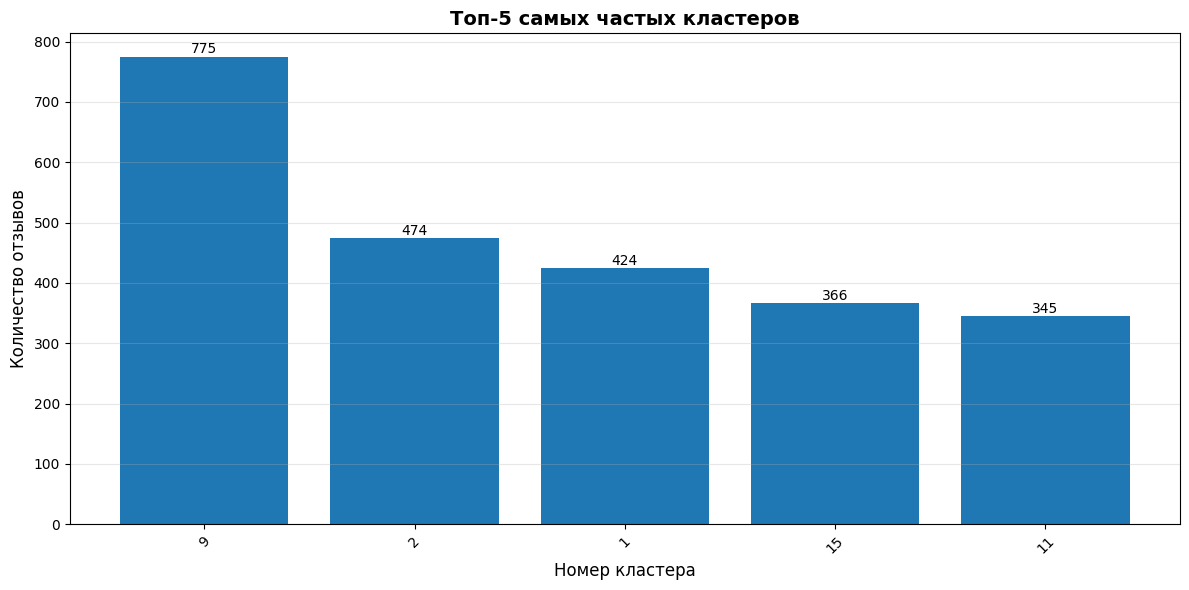

In [42]:
# 2. –¢–û–ü-<N> –°–ê–ú–´–• –ß–ê–°–¢–´–• –ö–õ–ê–°–¢–ï–†–û–í
top_n = 5
plt.figure(figsize=(12, 6))
top_clusters = df_with_clusters['cluster'].value_counts().head(top_n)
bars = plt.bar(top_clusters.index.astype(str), top_clusters.values)

# –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom')

plt.title(f'–¢–æ–ø-{top_n} —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤', fontsize=14, fontweight='bold')
plt.xlabel('–ù–æ–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞', fontsize=12)
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



In [ ]:
# 3. –î–ò–ù–ê–ú–ò–ö–ê –ö–õ–ê–°–¢–ï–†–û–í –í–û –í–†–ï–ú–ï–ù–ò (–ü–û –ú–ï–°–Ø–¶–ê–ú)
# –°–æ–∑–¥–∞–µ–º –∫–æ–ª–æ–Ω–∫—É —Å –º–µ—Å—è—Ü–µ–º –∏ –≥–æ–¥–æ–º
df_with_clusters['month_year'] = df_with_clusters['date'].dt.to_period('M')

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ –º–µ—Å—è—Ü—É –∏ –∫–ª–∞—Å—Ç–µ—Ä—É
monthly_clusters = df_with_clusters.groupby(['month_year', 'cluster']).size().unstack(fill_value=0)

# –ë–µ—Ä–µ–º —Ç–æ–ø-5 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
top_5_clusters = df_with_clusters['cluster'].value_counts().head(5).index
monthly_top = monthly_clusters[top_5_clusters]

plt.figure(figsize=(14, 8))
for cluster in top_5_clusters:
    plt.plot(monthly_top.index.astype(str), monthly_top[cluster],
             marker='o', linewidth=2, markersize=4, label=f'–ö–ª–∞—Å—Ç–µ—Ä {cluster}')

plt.title('–î–∏–Ω–∞–º–∏–∫–∞ —Ç–æ–ø-5 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –ø–æ –º–µ—Å—è—Ü–∞–º', fontsize=14, fontweight='bold')
plt.xlabel('–ú–µ—Å—è—Ü', fontsize=12)
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()






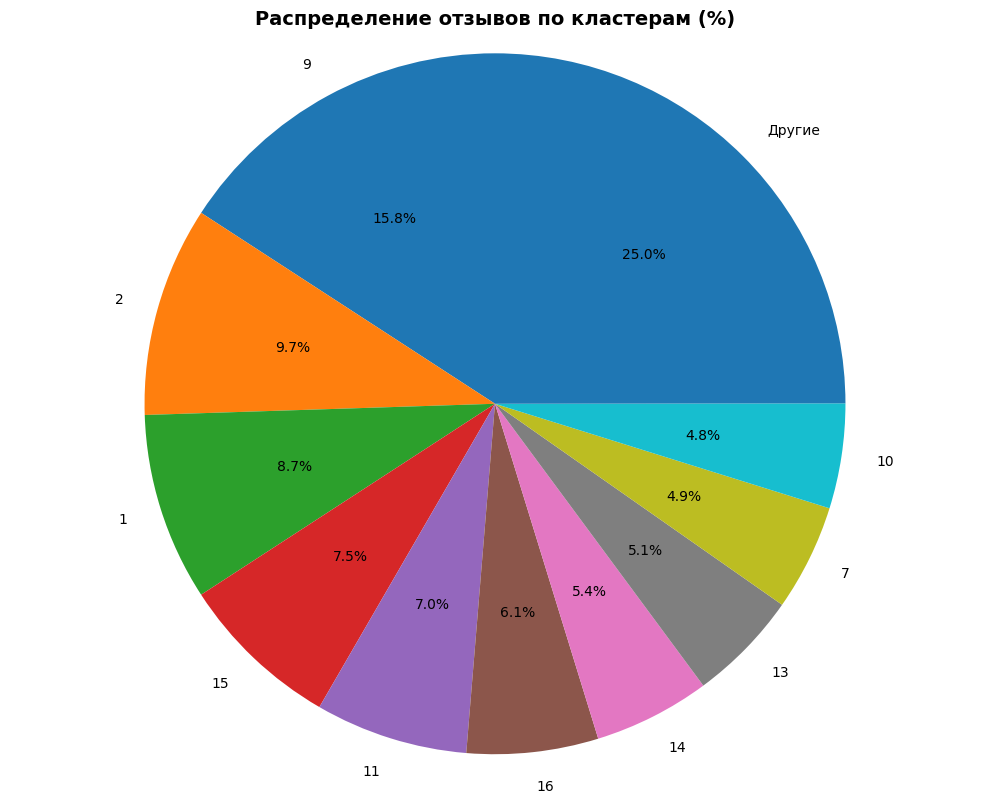

In [43]:
# 5. –ö–†–£–ì–û–í–ê–Ø –î–ò–ê–ì–†–ê–ú–ú–ê –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–Ø –ö–õ–ê–°–¢–ï–†–û–í
plt.figure(figsize=(10, 8))
cluster_percentages = df_with_clusters['cluster'].value_counts(normalize=True) * 100
top_10 = cluster_percentages.head(10)
other = cluster_percentages[10:].sum()
if other > 0:
    top_10['–î—Ä—É–≥–∏–µ'] = other

wedges, texts, autotexts = plt.pie(top_10.values, labels=top_10.index,
                                   autopct='%1.1f%%', startangle=90)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º (%)', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

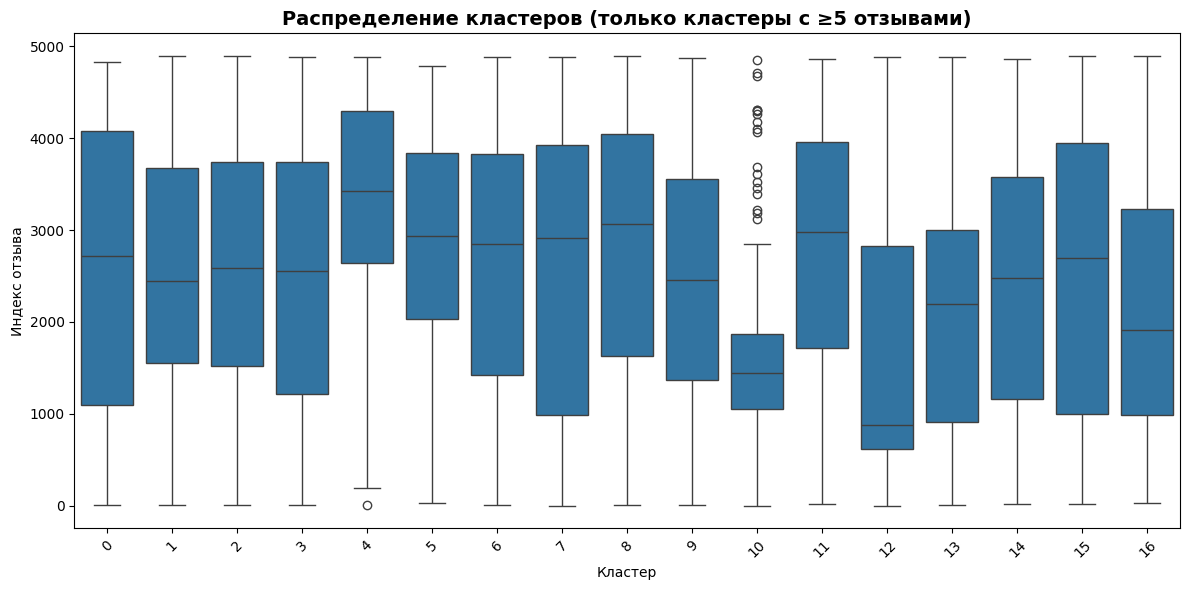

In [45]:
import seaborn as sns
# 6. –Ø–©–ò–ö –° –£–°–ê–ú–ò –î–õ–Ø –†–ê–°–ü–†–ï–î–ï–õ–ï–ù–ò–Ø –ö–õ–ê–°–¢–ï–†–û–í
plt.figure(figsize=(12, 6))
# –ë–µ—Ä–µ–º —Ç–æ–ª—å–∫–æ –∫–ª–∞—Å—Ç–µ—Ä—ã —Å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω—ã–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –¥–∞–Ω–Ω—ã—Ö –¥–ª—è boxplot
filtered_clusters = df_with_clusters['cluster'].value_counts()
valid_clusters = filtered_clusters[filtered_clusters >= 5].index
filtered_df = df_with_clusters[df_with_clusters['cluster'].isin(valid_clusters)]

sns.boxplot(x='cluster', y=filtered_df.index, data=filtered_df)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ (—Ç–æ–ª—å–∫–æ –∫–ª–∞—Å—Ç–µ—Ä—ã —Å ‚â•5 –æ—Ç–∑—ã–≤–∞–º–∏)', fontsize=14, fontweight='bold')
plt.xlabel('–ö–ª–∞—Å—Ç–µ—Ä')
plt.ylabel('–ò–Ω–¥–µ–∫—Å –æ—Ç–∑—ã–≤–∞')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()